In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
data = pd.read_csv('my_data.csv')

In [8]:
data.head()

,Year,gdp,per_capita_gdp,vc_funding,vc_deals_count,rnd_exp,unemp,Inf_Mort,national_health_exp,hdi,life_exp,health_emp_count
0,1990,1.8860,-1.79,1.5,100,9.5,2.3,9.4,718.7,0.860,75.4,8210.350000
1,1991,-0.1083,-1.99,1.6,110,10.0,2.4,9.1,786.0,0.864,75.5,8617.841667
2,1992,3.5225,3.63,1.7,120,11.1,2.5,8.8,852.2,0.868,75.8,8953.966667
3,1993,2.7518,-0.77,1.8,130,12.3,2.6,8.5,914.9,0.872,75.5,9253.458333
4,1994,4.0290,1.28,1.9,140,13.5,2.7,8.2,966.4,0.876,75.7,9529.825000


In [9]:



features = ['vc_funding', 'unemp', 'gdp', 'vc_deals_count', 'national_health_exp']
data = data[features]

# Function to forecast each feature with SARIMA for yearly data
def forecast_sarima_yearly(data, feature, steps=1):
    # Fit the SARIMA model (without seasonal component for yearly data)
    model = SARIMAX(data[feature], order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    
    # Forecast for the specified steps
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast each feature for 2024 (1 year ahead)
forecast_results = {}
for feature in features:
    print(f"Forecasting for feature: {feature}")
    forecast_results[feature] = forecast_sarima_yearly(data, feature, steps=1)

# Combine forecasts into a DataFrame
forecast_df = pd.DataFrame(forecast_results)
forecast_df.index = pd.date_range(start='2024', periods=1, freq='Y')  # Set index for 2024

print("Forecasts for 2024:")
print(forecast_df)


   vc_funding  unemp     gdp  vc_deals_count  national_health_exp
0         1.5    2.3  1.8860             100                718.7
1         1.6    2.4 -0.1083             110                786.0
2         1.7    2.5  3.5225             120                852.2
3         1.8    2.6  2.7518             130                914.9
4         1.9    2.7  4.0290             140                966.4
Forecasting for feature: vc_funding
Forecasting for feature: unemp
Forecasting for feature: gdp
Forecasting for feature: vc_deals_count


C:\Anaconda Navigator\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda Navigator\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Forecasting for feature: national_health_exp
Forecasts for 2024:
            vc_funding    unemp       gdp  vc_deals_count  national_health_exp
2024-12-31   11.303282  2.65535  2.391313      511.029776          4746.676846


C:\Users\SUSHANT\AppData\Local\Temp\ipykernel_22336\4011378341.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_df.index = pd.date_range(start='2024', periods=1, freq='Y')  # Set index for 2024


In [11]:


# Select the features for forecasting
features = ['vc_funding', 'unemp', 'gdp', 'vc_deals_count', 'national_health_exp']
data = data[features]


# Function to forecast each feature with SARIMA for yearly data over multiple years
def forecast_sarima_yearly(data, feature, steps=5):
  
    # Fit the SARIMA model (without seasonal component for yearly data)
    model = SARIMAX(data[feature], order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    
    # Forecast for the specified steps (5 years ahead)
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast each feature for the next 5 years (2024–2028)
forecast_results = {}
for feature in features:
    forecast_results[feature] = forecast_sarima_yearly(data, feature, steps=5)

# Combine forecasts into a DataFrame
forecast_df = pd.DataFrame(forecast_results)
forecast_df.index = pd.date_range(start='2024', periods=5, freq='Y')  # Set index from 2024 to 2028

print("Forecasts for 2024–2028:")
print(forecast_df)


Forecasting for feature: vc_funding
Forecasting for feature: unemp
Forecasting for feature: gdp
Forecasting for feature: vc_deals_count


C:\Anaconda Navigator\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda Navigator\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Forecasting for feature: national_health_exp
Forecasts for 2024–2028:
            vc_funding     unemp       gdp  vc_deals_count  \
2024-12-31   11.303282  2.655350  2.391313      511.029776   
2025-12-31   11.617933  2.824091  2.374248      515.863179   
2026-12-31   11.782045  2.947702  2.372325      517.656133   
2027-12-31   11.867640  3.038253  2.372108      518.321230   
2028-12-31   11.912283  3.104585  2.372083      518.567949   

            national_health_exp  
2024-12-31          4746.676846  
2025-12-31          4906.895289  
2026-12-31          5065.433145  
2027-12-31          5222.308040  
2028-12-31          5377.537420  


C:\Users\SUSHANT\AppData\Local\Temp\ipykernel_22336\545869887.py:36: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_df.index = pd.date_range(start='2024', periods=5, freq='Y')  # Set index from 2024 to 2028


C:\Anaconda Navigator\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda Navigator\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


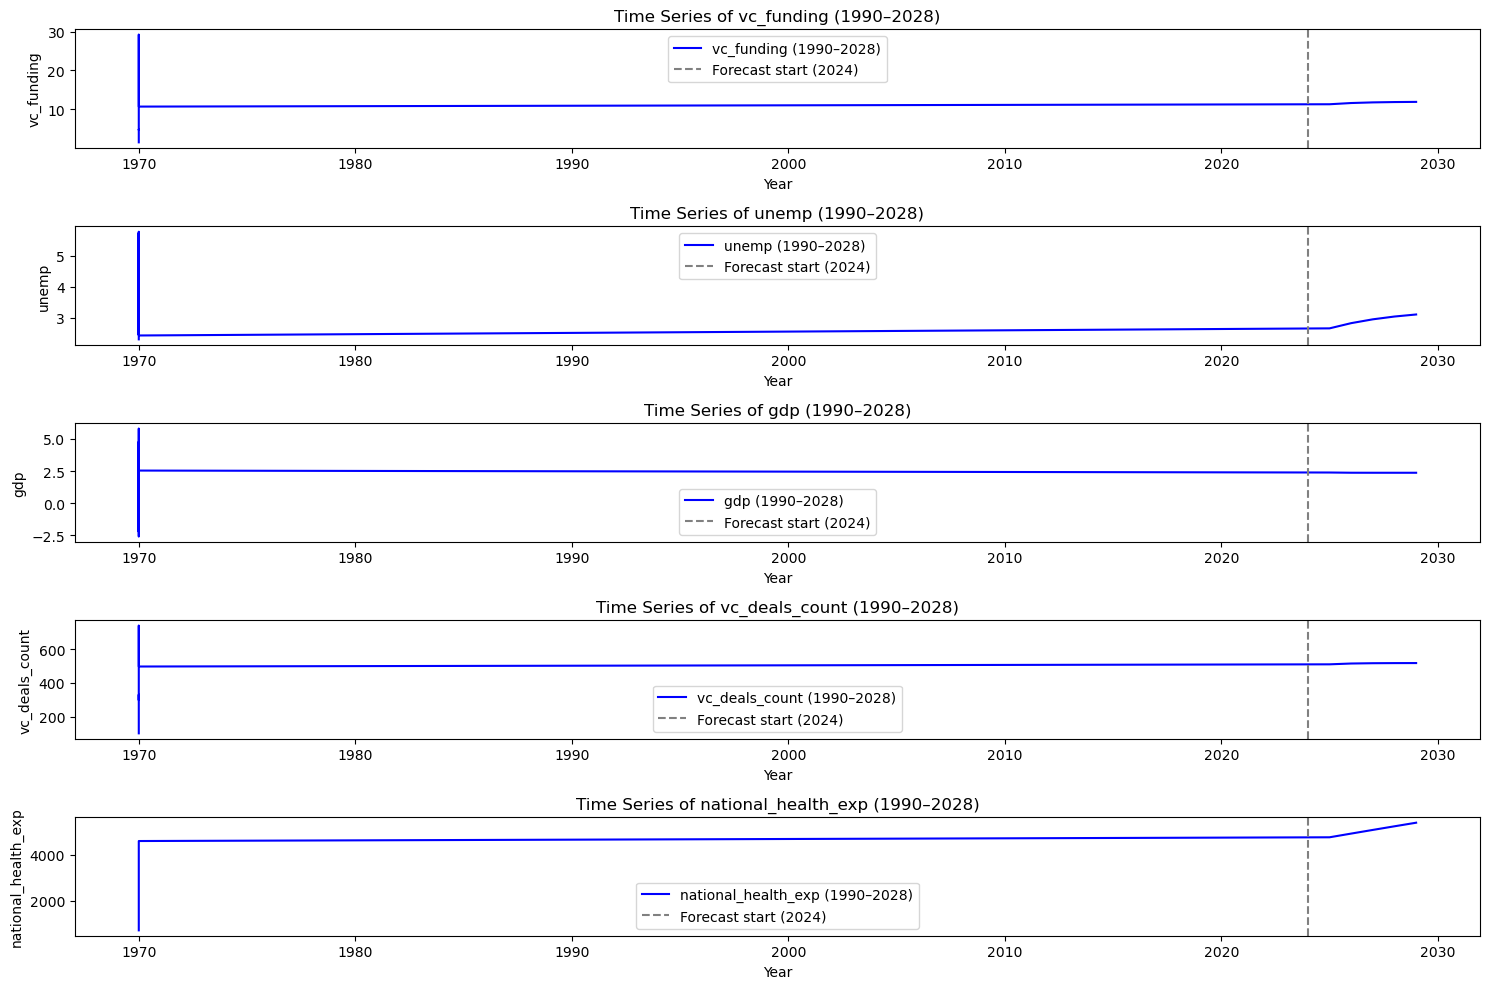

In [13]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Select the features for forecasting and plotting
features = ['vc_funding', 'unemp', 'gdp', 'vc_deals_count', 'national_health_exp']
data = data[features]

# Forecasting each feature for the next 5 years (2024–2028) as done previously
def forecast_sarima_yearly(data, feature, steps=5):
    model = SARIMAX(data[feature], order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast each feature for the next 5 years and store in a DataFrame
forecast_results = {}
for feature in features:
    forecast_results[feature] = forecast_sarima_yearly(data, feature, steps=5)

forecast_df = pd.DataFrame(forecast_results)
forecast_df.index = pd.date_range(start='2024', periods=5, freq='YE')  # Use 'YE' for yearly end frequency

# Combine historical and forecasted data for plotting
combined_data = pd.concat([data, forecast_df])

# Ensure index is uniformly datetime for plotting
combined_data.index = pd.to_datetime(combined_data.index)

# Plot each feature separately
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)  # Create a subplot for each feature
    plt.plot(combined_data[feature], label=f'{feature} (1990–2028)', color='blue')
    plt.axvline(x=pd.to_datetime('2023-12-31'), color='gray', linestyle='--', label='Forecast start (2024)')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.title(f'Time Series of {feature} (1990–2028)')
    plt.legend()

plt.tight_layout()
plt.show()


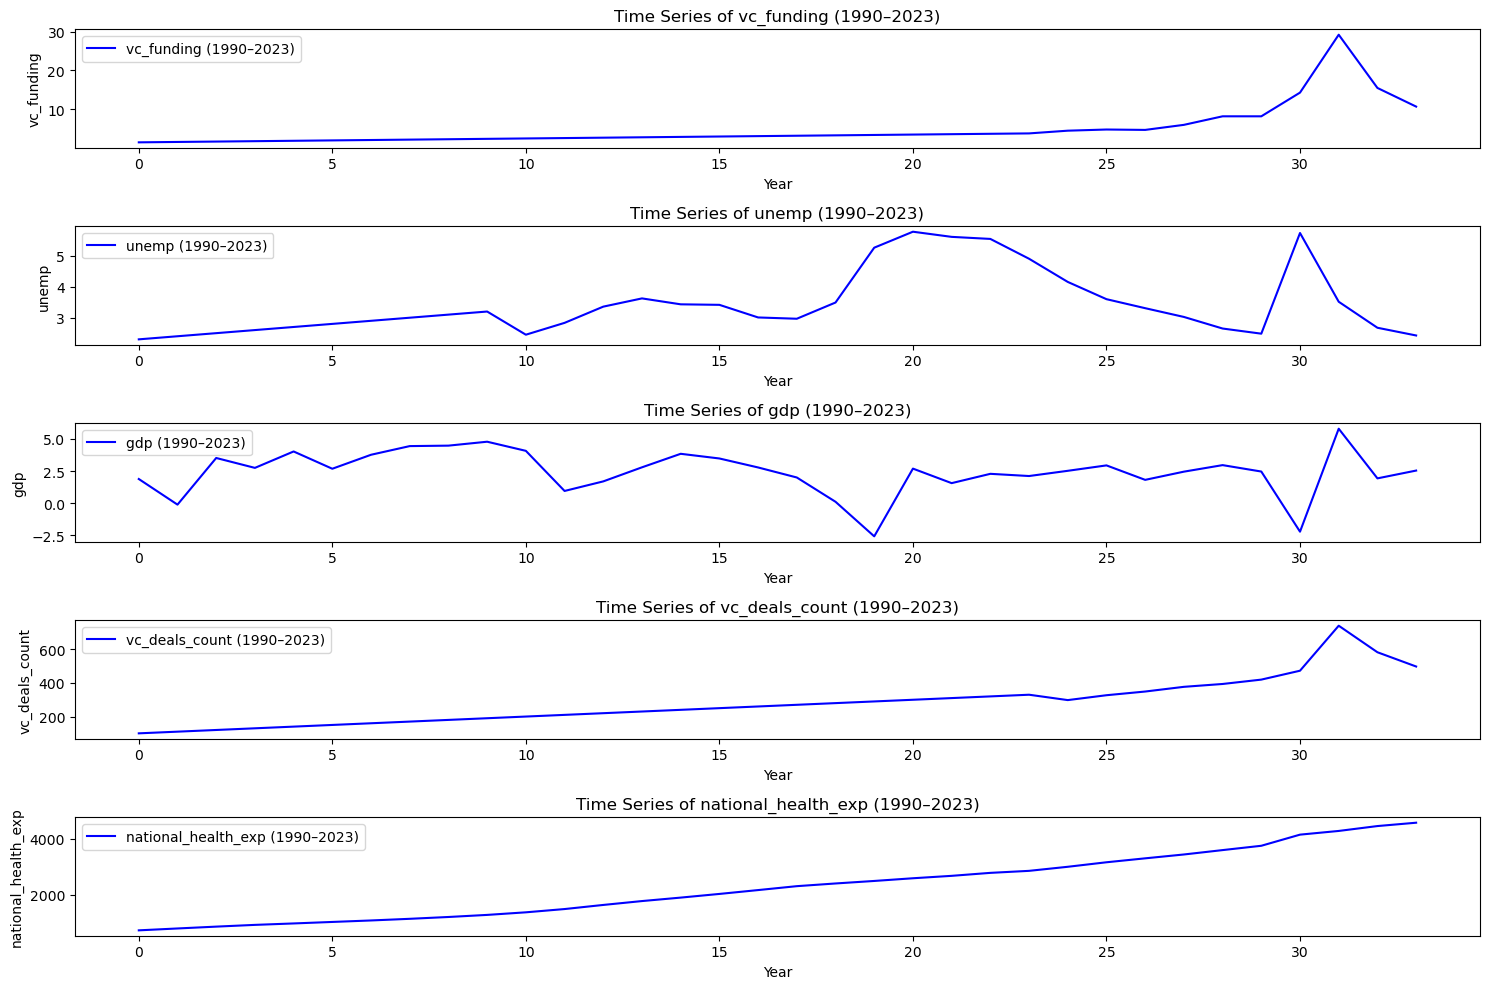

In [16]:
import matplotlib.pyplot as plt

# Plot historical data only
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)  # Create a subplot for each feature
    plt.plot(data[feature], label=f'{feature} (1990–2023)', color='blue')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.title(f'Time Series of {feature} (1990–2023)')
    plt.legend()

plt.tight_layout()
plt.show()


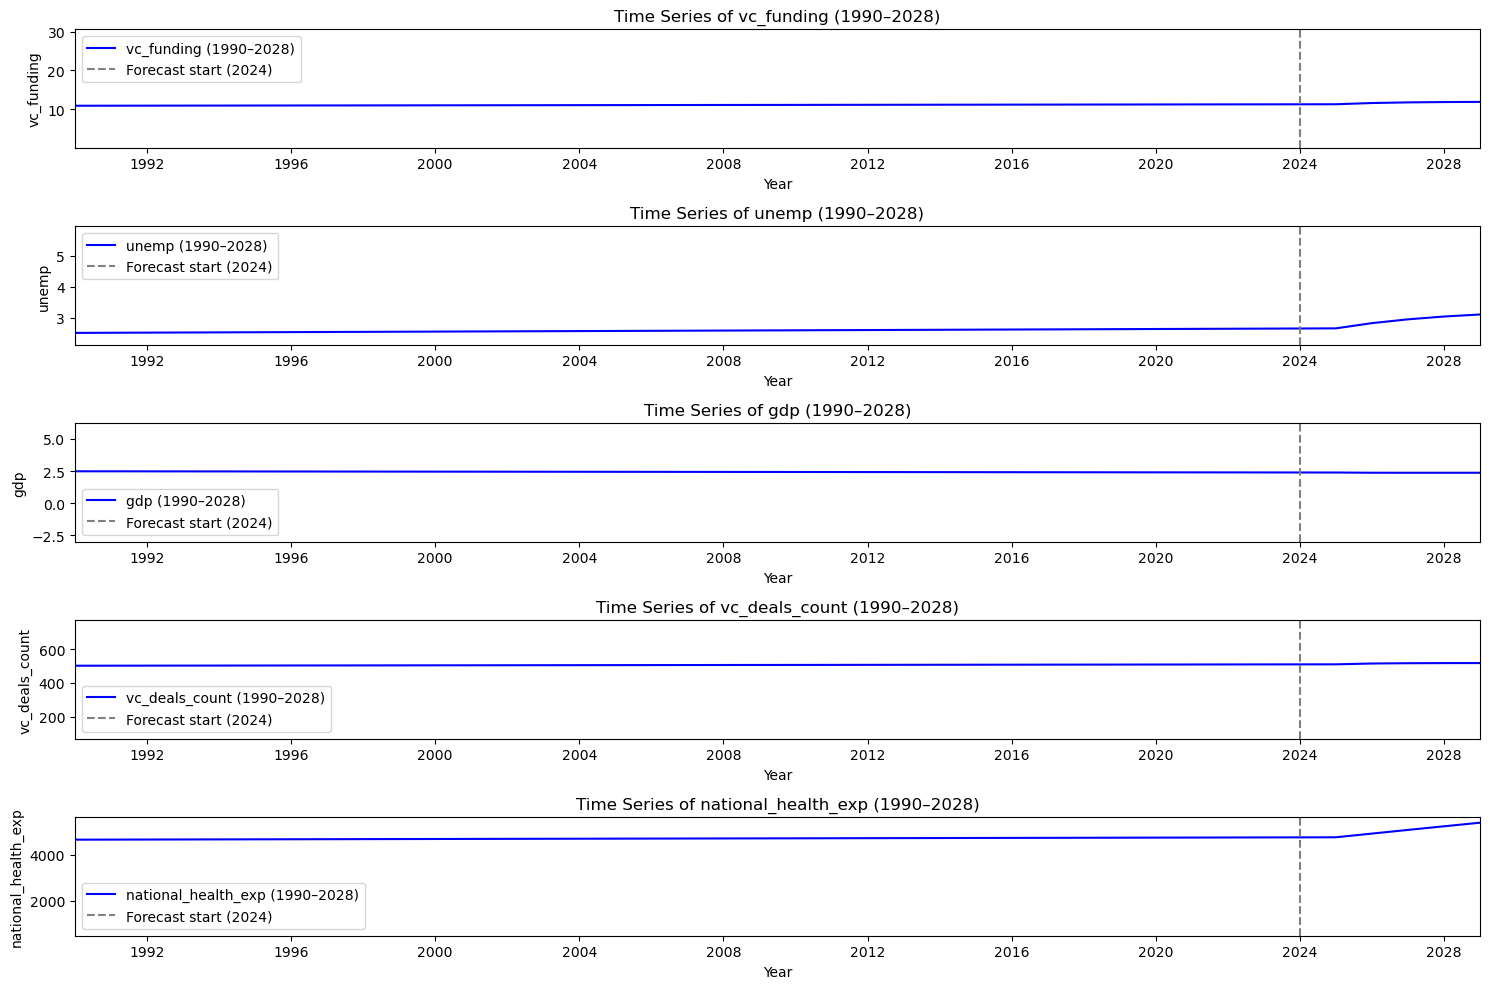

In [17]:
# Concatenate historical and forecast data carefully
forecast_df.index = pd.date_range(start='2024', periods=5, freq='YE')
combined_data = pd.concat([data, forecast_df])

# Ensure the index is in datetime format and spans 1990 to 2028
combined_data.index = pd.to_datetime(combined_data.index)

# Re-plot with historical and forecast data
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    plt.plot(combined_data[feature], label=f'{feature} (1990–2028)', color='blue')
    plt.axvline(x=pd.to_datetime('2023-12-31'), color='gray', linestyle='--', label='Forecast start (2024)')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.title(f'Time Series of {feature} (1990–2028)')
    plt.xlim(pd.to_datetime('1990-01-01'), pd.to_datetime('2028-12-31'))
    plt.legend()

plt.tight_layout()
plt.show()


C:\Anaconda Navigator\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda Navigator\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


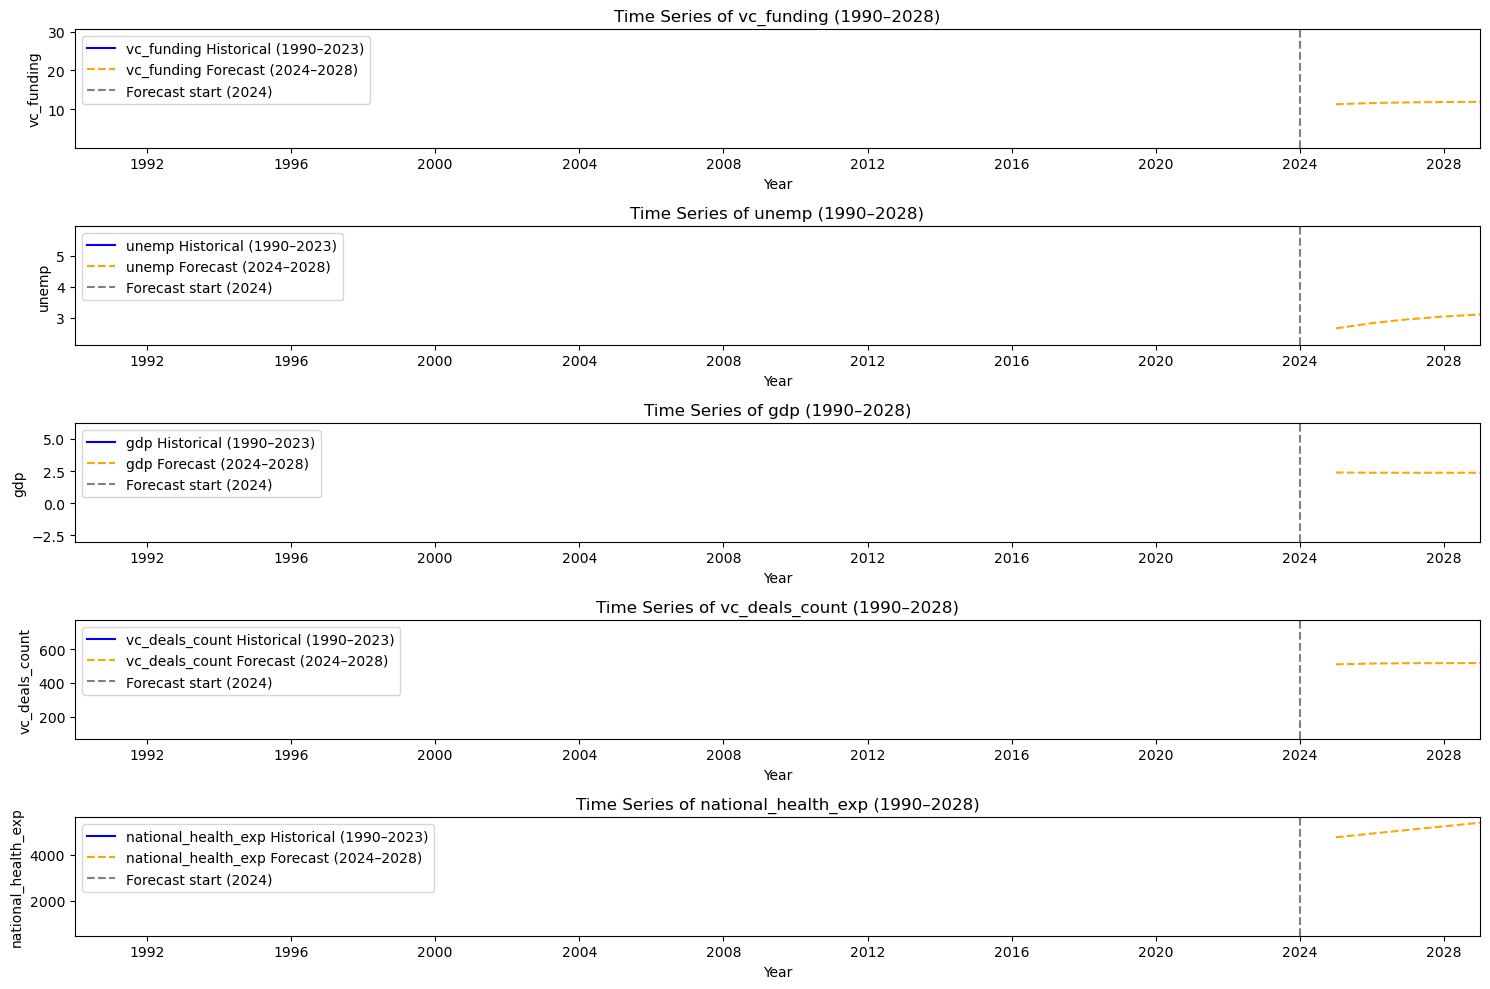

In [18]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Selection of the features for forecasting and plotting
features = ['vc_funding', 'unemp', 'gdp', 'vc_deals_count', 'national_health_exp']
data = data[features]

# Forecasting each feature for the next 5 years (2024–2028)
def forecast_sarima_yearly(data, feature, steps=5):
    model = SARIMAX(data[feature], order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast each feature for the next 5 years and store in a DataFrame
forecast_results = {}
for feature in features:
    forecast_results[feature] = forecast_sarima_yearly(data, feature, steps=5)

forecast_df = pd.DataFrame(forecast_results)

# Set the index for forecast from 2024 to 2028
forecast_df.index = pd.date_range(start='2024', periods=5, freq='YE')

# Ensure no alignment issues when concatenating
combined_data = pd.concat([data, forecast_df], axis=0)

# Plot historical and forecasted data separately for clarity
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)  # Create a subplot for each feature
    plt.plot(data[feature], label=f'{feature} Historical (1990–2023)', color='blue')
    plt.plot(forecast_df[feature], label=f'{feature} Forecast (2024–2028)', color='orange', linestyle='--')
    plt.axvline(x=pd.to_datetime('2023-12-31'), color='gray', linestyle='--', label='Forecast start (2024)')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.title(f'Time Series of {feature} (1990–2028)')
    plt.xlim(pd.to_datetime('1990-01-01'), pd.to_datetime('2028-12-31'))
    plt.legend()

plt.tight_layout()
plt.show()
